In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf

In [3]:
picpath = 'test.jpg'
img_cv = cv2.imread(picpath)

frame_number = 48
frame_header = 0
frame_px = 64
px_bit = 4
bit_rate = 10 #10 bits/s
T = (frame_header + frame_px)*frame_number*px_bit/bit_rate
dt = 1/4800
t = np.arange(0, T, dt)

In [4]:
def sin_singal(freq, phi=0):
    return np.cos(2 * np.pi * (freq * t + phi))

DTMF_1_sig = sin_singal(freq=697)
DTMF_2_sig = sin_singal(freq=770)
DTMF_3_sig = sin_singal(freq=852)
DTMF_4_sig = sin_singal(freq=941)

DTMF_A_sig = sin_singal(freq=1209)
DTMF_B_sig = sin_singal(freq=1336)
DTMF_C_sig = sin_singal(freq=1477)
DTMF_D_sig = sin_singal(freq=1633)

frame_header_sig = (sin_singal(freq=400)+sin_singal(freq=2400))/2

In [5]:
img_data = img_cv[0:frame_number,0:frame_px,0]
d_img_data = img_data
for i in range(0,frame_number):
    for j in range(0,frame_px):
        d_img_data[i, j] = img_data[i, j]/256*(2**px_bit)

In [6]:
def encode_frame(data):
    DTMF_sig = np.empty(len(t))
    for i in range(0,int(frame_header/(frame_header+frame_px))*len(t)):
        DTMF_sig[i] = frame_header_sig[i]
    for i in range(int(frame_header/(frame_header+frame_px))*len(t), len(t)):
        if(data[int(i*dt*frame_px/T)] == 0):
            DTMF_sig[i] = DTMF_1_sig[i] + DTMF_A_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 1):
            DTMF_sig[i] = DTMF_1_sig[i] + DTMF_B_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 2):
            DTMF_sig[i] = DTMF_1_sig[i] + DTMF_C_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 3):
            DTMF_sig[i] = DTMF_1_sig[i] + DTMF_D_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 4):
            DTMF_sig[i] = DTMF_2_sig[i] + DTMF_A_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 5):
            DTMF_sig[i] = DTMF_2_sig[i] + DTMF_B_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 6):
            DTMF_sig[i] = DTMF_2_sig[i] + DTMF_C_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 7):
            DTMF_sig[i] = DTMF_2_sig[i] + DTMF_D_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 8):
            DTMF_sig[i] = DTMF_3_sig[i] + DTMF_A_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 9):
            DTMF_sig[i] = DTMF_3_sig[i] + DTMF_B_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 10):
            DTMF_sig[i] = DTMF_3_sig[i] + DTMF_C_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 11):
            DTMF_sig[i] = DTMF_3_sig[i] + DTMF_D_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 12):
            DTMF_sig[i] = DTMF_4_sig[i] + DTMF_A_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 13):
            DTMF_sig[i] = DTMF_4_sig[i] + DTMF_B_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 14):
            DTMF_sig[i] = DTMF_4_sig[i] + DTMF_C_sig[i]
        elif(data[int(i*dt*frame_px/T)] == 15):
            DTMF_sig[i] = DTMF_4_sig[i] + DTMF_D_sig[i]
    return DTMF_sig

In [ ]:
out_sig = np.empty([frame_number, len(t)])
for i in range(0, frame_number):
    out_sig[i, :] =encode_frame(d_img_data[i, :])


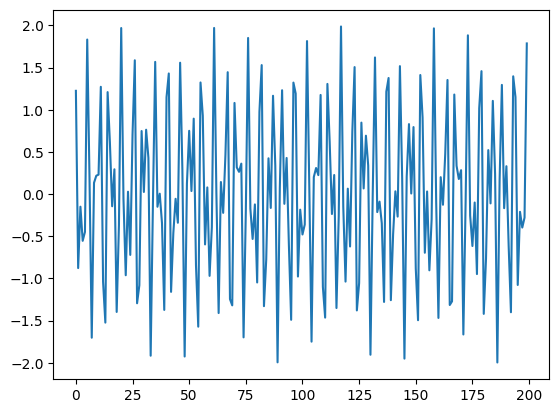

In [22]:
plt.plot(out_sig.flatten()[])
plt.show()

In [ ]:
out_audio = np.zeros_like(out_sig.flatten(), dtype=np.uint8)
for i in range(0, len(t)):
    out_audio[i] = int((out_sig.flatten()[i]/2+1)*127)
wf.write("out.wav", int(1/dt), out_audio)